In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Load the dataset:

# Assuming your dataset is in a file named 'data.csv'
data = pd.read_csv('datasets/COVID19-medical-targets.csv')
data


,Derivation cohort,LOS_Y,LOS,Death,Age,Severity,Black,White,Asian,Latino,...,Ferritin > 300,CrctProtYes,CrctProtein,C-Reactive Prot > 10,ProCalCYes,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1
0,1,1,1,0,>80,3,0,0,0,0,...,0,1,0.4999,0,0,0.0000,0,1,0.01,0
1,1,1,2,1,>60,7,0,1,0,0,...,1,1,14.9000,1,1,0.6000,1,1,1.20,1
2,1,1,2,1,>80,7,0,1,0,0,...,1,1,33.9000,1,1,1.2000,1,0,0.00,0
3,1,1,15,0,>70,9,1,0,0,0,...,1,1,18.4000,1,1,7.3000,1,1,0.05,0
4,1,1,9,0,>70,7,1,0,0,0,...,1,1,11.6000,1,0,0.0000,0,1,0.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4706,0,1,4,0,>70,4,0,0,1,0,...,0,1,1.8000,0,1,0.0999,0,1,0.01,0
4707,0,1,2,0,>60,2,0,0,0,1,...,1,1,3.1000,0,1,0.0999,0,1,0.01,0
4708,0,0,0,0,>60,1,0,0,0,0,...,0,1,0.4999,0,1,0.0000,0,0,0.00,0
4709,0,0,0,0,>80,3,1,0,0,0,...,1,1,8.6000,0,1,0.1000,0,1,0.01,0


In [2]:
data.describe()

,Derivation cohort,LOS_Y,LOS,Death,Severity,Black,White,Asian,Latino,MI,...,Ferritin > 300,CrctProtYes,CrctProtein,C-Reactive Prot > 10,ProCalCYes,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1
count,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,...,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000
mean,0.499682,0.927616,7.160263,0.243685,3.586287,0.369985,0.098917,0.025685,0.372108,0.042666,...,0.543621,0.836128,10.314919,0.393335,0.655487,1.585601,0.365952,0.863935,0.051558,0.095521
std,0.500053,0.259150,7.029782,0.429350,2.289303,0.482852,0.298583,0.158209,0.483418,0.202125,...,0.498146,0.370198,11.223356,0.488542,0.475260,6.262625,0.481747,0.342893,0.268160,0.293965
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.900000,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000,0.000000
50%,0.000000,1.000000,5.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,6.500000,0.000000,1.000000,0.100000,0.000000,1.000000,0.010000,0.000000
75%,1.000000,1.000000,9.000000,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,16.000000,1.000000,1.000000,0.400000,1.000000,1.000000,0.020000,0.000000
max,1.000000,1.000000,56.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,100.000100,1.000000,1.000000,50.000100,1.000000,1.000000,9.560000,1.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711 entries, 0 to 4710
Data columns (total 85 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Derivation cohort      4711 non-null   int64  
 1   LOS_Y                  4711 non-null   int64  
 2   LOS                    4711 non-null   int64  
 3   Death                  4711 non-null   int64  
 4   Age                    4711 non-null   object 
 5   Severity               4711 non-null   int64  
 6   Black                  4711 non-null   int64  
 7   White                  4711 non-null   int64  
 8   Asian                  4711 non-null   int64  
 9   Latino                 4711 non-null   int64  
 10  MI                     4711 non-null   int64  
 11  PVD                    4711 non-null   int64  
 12  CHF                    4711 non-null   int64  
 13  CVD                    4711 non-null   int64  
 14  DEMENT                 4711 non-null   int64  
 15  COPD

We can find that "Age" is not a suitble format for data analyse.
So reflect it by median 

In [4]:
print("\nNO. OF Age:", data['Age'].nunique())
print("Ages:", data['Age'].unique())


NO. OF Age: 4
Ages: ['>80' '>60' '>70' '0-60']


In [5]:
age_mapping = {
    '>80': 85,
    '>70': 75,
    '>60': 65,
    '0-60': 30
}

data['Age'] = data['Age'].map(age_mapping)

## Visualize Features

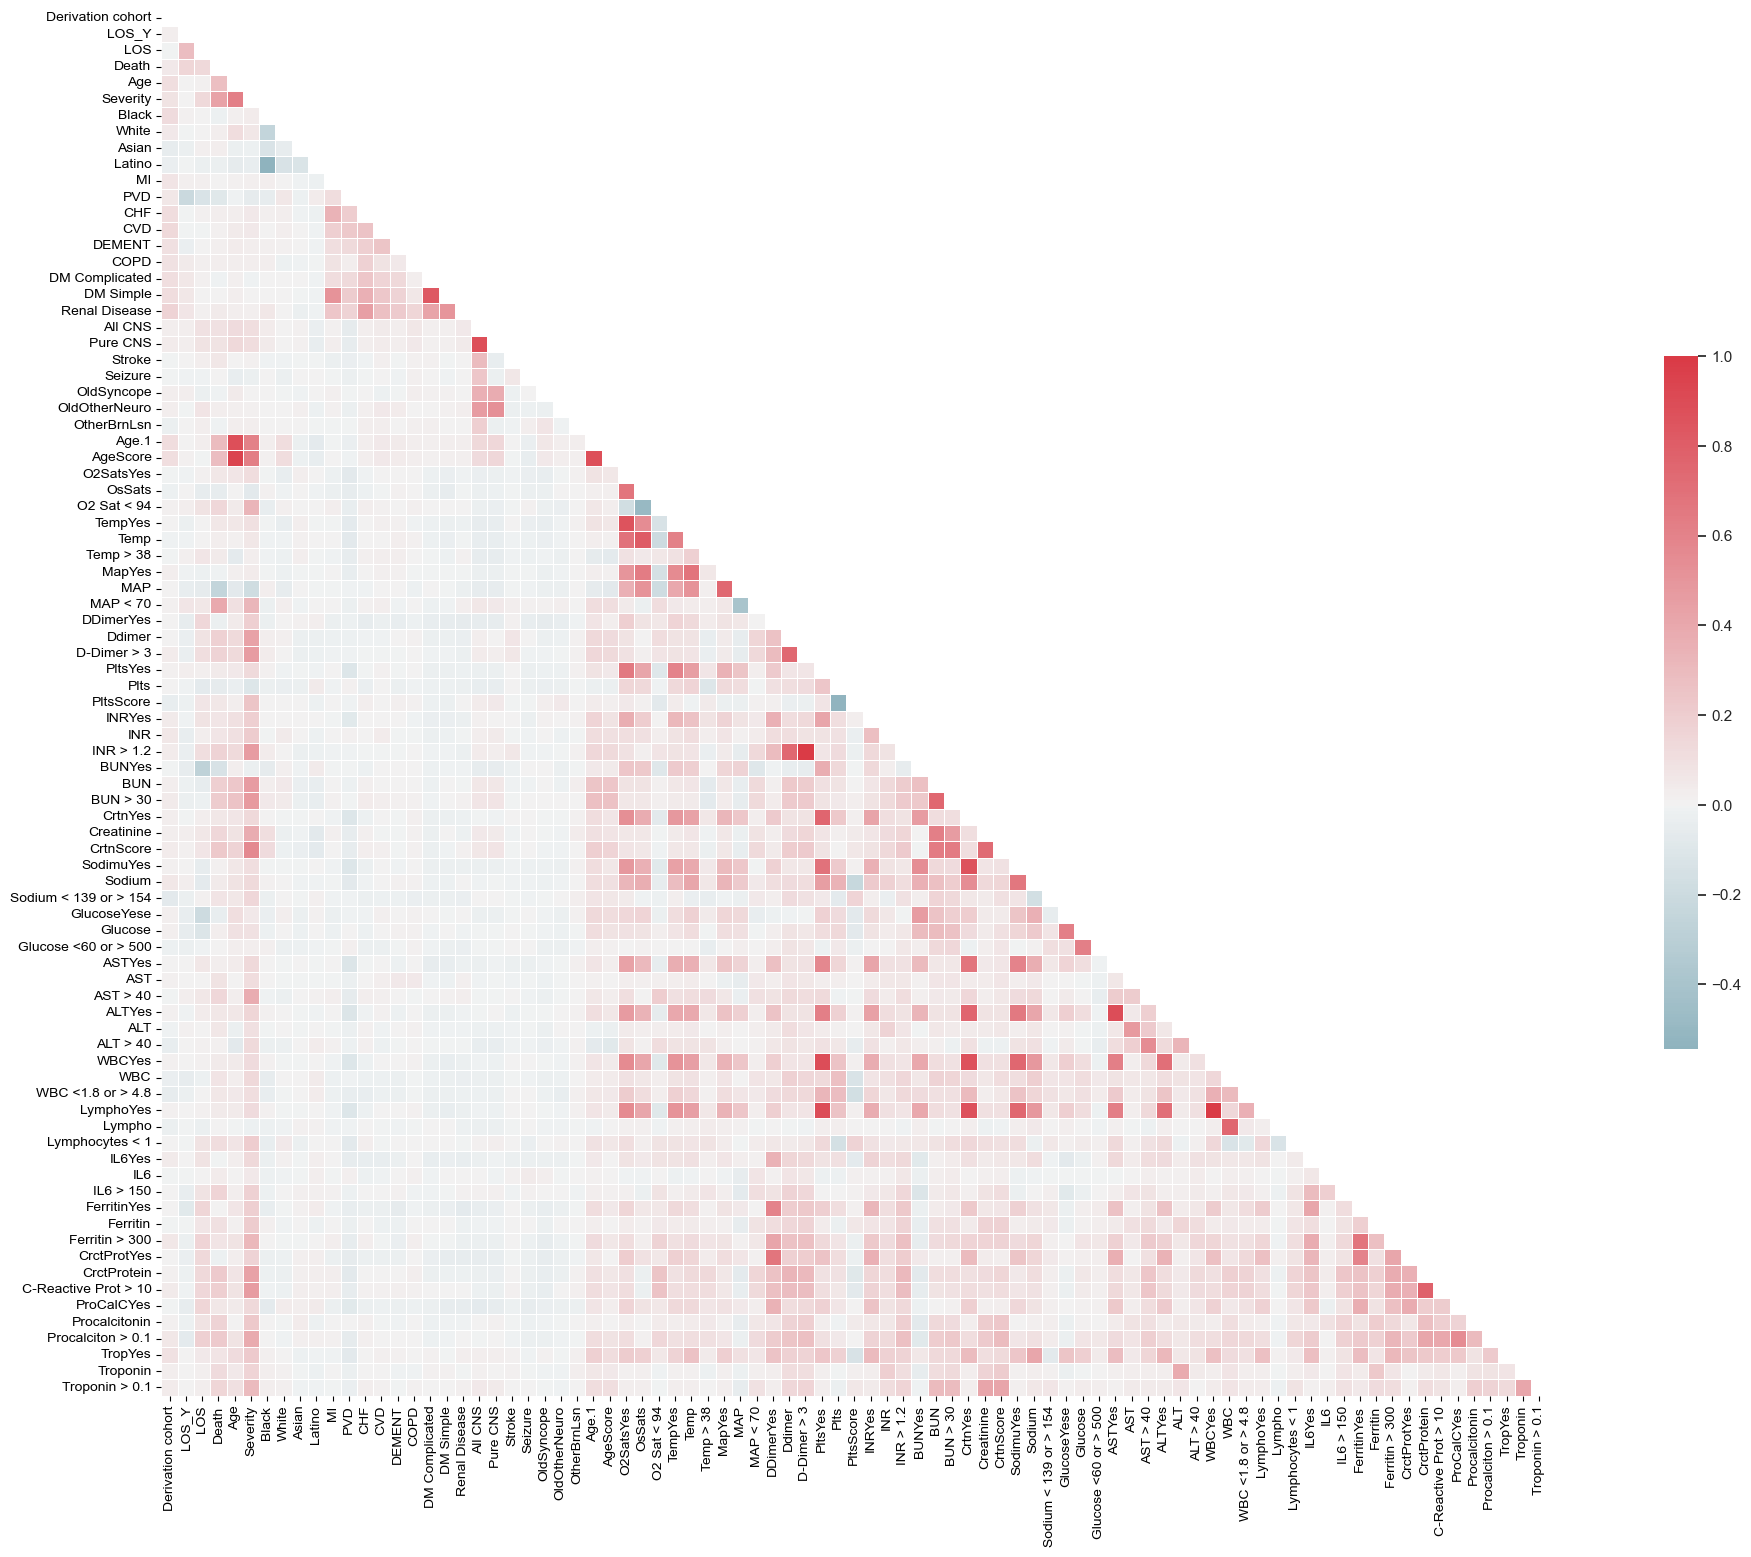

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
def corr_map(df):
    var_corr = df.corr()
    mask = np.zeros_like(var_corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    f, ax = plt.subplots(figsize=(30, 18))
    plt.rcParams['savefig.dpi'] = 400 #pixel
    plt.rcParams['figure.dpi'] = 400 #resolution
    sns.set(font_scale=1)
    sns.heatmap(var_corr, mask=mask, cmap=cmap, vmax=1, center=0
               ,square=True, linewidths=.5, cbar_kws={"shrink": .5}
               ,annot=False,annot_kws={'size':12,'weight':'bold', 'color':'black'})
    plt.show() 
corr_map(data)

In [7]:
# c. Split the dataset into features and target:

X = data.drop(['Death'], axis=1)  # Features
y = data['Death']  # Target variable

display(X)
print(y)

,Derivation cohort,LOS_Y,LOS,Age,Severity,Black,White,Asian,Latino,MI,...,Ferritin > 300,CrctProtYes,CrctProtein,C-Reactive Prot > 10,ProCalCYes,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1
0,1,1,1,85,3,0,0,0,0,0,...,0,1,0.4999,0,0,0.0000,0,1,0.01,0
1,1,1,2,65,7,0,1,0,0,0,...,1,1,14.9000,1,1,0.6000,1,1,1.20,1
2,1,1,2,85,7,0,1,0,0,0,...,1,1,33.9000,1,1,1.2000,1,0,0.00,0
3,1,1,15,75,9,1,0,0,0,1,...,1,1,18.4000,1,1,7.3000,1,1,0.05,0
4,1,1,9,75,7,1,0,0,0,0,...,1,1,11.6000,1,0,0.0000,0,1,0.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4706,0,1,4,75,4,0,0,1,0,0,...,0,1,1.8000,0,1,0.0999,0,1,0.01,0
4707,0,1,2,65,2,0,0,0,1,0,...,1,1,3.1000,0,1,0.0999,0,1,0.01,0
4708,0,0,0,65,1,0,0,0,0,0,...,0,1,0.4999,0,1,0.0000,0,0,0.00,0
4709,0,0,0,85,3,1,0,0,0,0,...,1,1,8.6000,0,1,0.1000,0,1,0.01,0


0       0
1       1
2       1
3       0
4       0
       ..
4706    0
4707    0
4708    0
4709    0
4710    0
Name: Death, Length: 4711, dtype: int64


In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
def MyPCA(data):
    data_std = StandardScaler().fit_transform(data)
    pca = PCA(n_components = 0.98)
    pca.fit(data_std)
    new_data = data.dot(pca.components_.T)
    return new_data

def MyUpDimension(data):
    poly=PolynomialFeatures(degree=2).fit(data) #ploy.get_feature_names()可以输出x的n维变量组合
    new_data=poly.transform(data)#Transform data to polynomial features.将0.1 变成1 0.1 0.01（代入）

    return new_data

In [9]:
# d. Split the data into training and testing sets:
X_np, y_np = X.to_numpy(), y.to_numpy()
X_pca = MyPCA(X_np)
X_poly = MyUpDimension(X_np)
X_both = MyPCA(X_poly)
# X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)
# X_train_pca, X_test_pca = MyPCA(X_train, X_test)
# X_train_poly, X_test_poly = MyUpDimension(X_train, X_test)
# X_train_both, X_test_both = MyPCA(X_train_poly, X_test_poly)
# print(X_train.shape,X_train_pca.shape,X_train_up.shape)
# # e. Scale the features (optional but often recommended):
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# K-fold training

In [13]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from copy import deepcopy
import lightgbm as lgb

def fit_a_model(model, X, y, splits=5, size=0.2,model_type="ML"):
    #n fold and shuffle
    shuffle = ShuffleSplit(n_splits=splits, test_size=size, random_state=1853568)
    n_fold = 1
    best_score = -1e50
    best_score_fold = -1
    best_model = None
    best_pred = None
    best_report = None
    
    # loop
    for train_indices, test_indices in shuffle.split(X):
        tmp_model = deepcopy(model)
        X_train_fold = X[train_indices]
        y_train_fold = y[train_indices]
        X_test_fold = X[test_indices]
        y_test_fold = y[test_indices]
        # fit model
        if model_type == "ML":
            tmp_model.fit(X_train_fold,y_train_fold)
        else:
            X_train_tensor = torch.tensor(X_train_fold,dtype=torch.float).to(device)
            y_train_tensor = torch.tensor(y_train_fold,dtype=torch.int64).to(device)
            train_dataset = TensorDataset(X_train_tensor,y_train_tensor)
            X_test_tensor = torch.tensor(X_test_fold,dtype=torch.float).to(device)
            y_test_tensor = torch.tensor(y_test_fold,dtype=torch.int64).to(device)
            test_dataset = TensorDataset(X_test_tensor,y_test_tensor)

            # Create a DataLoader
            batch_size = 64  # Adjust this to your desired batch size
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
            if  model_type == "ANN":
                tmp_model.to(device).fit(train_loader,test_loader)
            else:
                # Create a LightGBM dataset
                train_data = lgb.Dataset(X_train_fold, label=y_train_fold)

                # Define LightGBM parameters
                params = {
                    'objective': 'binary',
                    'metric': 'binary_logloss',
                    'boosting_type': 'gbdt',
                    'num_leaves': 31,
                    'learning_rate': 0.05,
                    'feature_fraction': 0.9,
                    'verbose': -1
                }

                # Train the LightGBM classifier
                num_round = 100  # Number of boosting rounds (you can adjust this)
                tmp_model = lgb.train(params, train_data, num_round)
        #test
        if model_type == "ML":
            y_pred = tmp_model.predict(X_test_fold)
        elif model_type == "LGB":
            # Make predictions on the test set
            y_pred = tmp_model.predict(X_test_tensor.cpu().detach().numpy(), num_iteration=tmp_model.best_iteration)

            # Convert probability scores to binary predictions
            y_pred = np.round(y_pred)
        else:
            y_pred = tmp_model.predict(X_test_tensor).cpu().detach().numpy()

        score = accuracy_score(y_test_fold, y_pred)
        

        if(score > best_score):
            best_score = score
            best_score_fold = n_fold
            best_model = deepcopy(tmp_model)
            best_pred = y_pred
            best_report = classification_report(y_test_fold, y_pred)
        n_fold += 1
    # # test
    # y_pred = model.predict(X_test_fold)

    # # Evaluate the model
    # accuracy = accuracy_score(y_test_fold, y_pred)
    # report = classification_report(y_test_fold, y_pred)

    
    print(f'test score(using model in fold {best_score_fold} Accuracy: {best_score}):')
    print(best_report)
   

## Random Forest Classifier

In [14]:

# Build a Binary Classifier:
clf = RandomForestClassifier(random_state=42)
fit_a_model(clf, X_np, y_np, splits=5,size=0.2)

fit_a_model(clf, X_pca, y_np, splits=5,size=0.2)

fit_a_model(clf, X_poly, y_np, splits=5,size=0.2)
fit_a_model(clf, X_both, y_np, splits=5,size=0.2)


test score(using model in fold 2 Accuracy: 0.8536585365853658):
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       713
           1       0.83      0.50      0.63       230

    accuracy                           0.85       943
   macro avg       0.84      0.74      0.77       943
weighted avg       0.85      0.85      0.84       943

test score(using model in fold 3 Accuracy: 0.8027571580063627):
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       708
           1       0.75      0.31      0.44       235

    accuracy                           0.80       943
   macro avg       0.78      0.64      0.66       943
weighted avg       0.79      0.80      0.77       943

test score(using model in fold 2 Accuracy: 0.8568398727465536):
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       713
           1       0.83      0.52      0.64  

# ANN

In [15]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")





e:\FileRecv\Anaconda\envs\pythonProject\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        # train step
        outputs = model(inputs)

        # backward
        loss = criterion(outputs, labels)
        loss.backward()
       
        optimizer.step()

    return loss

def test_model(model, test_loader, criterion, device):
    model.eval()
    correct = 0
    total = 0
    test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)

            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = (correct / total)
    return test_loss/len(test_loader), accuracy


In [18]:
class ANN(nn.Module):
    def __init__(self,LR=1e-3,num_epochs=100):
        super(ANN, self).__init__()
        self.num_epochs = num_epochs
        self.model = nn.Sequential(nn.Linear(84, 200),
                                nn.ReLU(),
                                nn.Linear(200, 200),
                                nn.LogSoftmax(dim=1),
                                nn.Linear(200,2)
                                ).to(device)


        self.optimizer = torch.optim.Adam(self.model.parameters(), LR)

        # loss
        self.criterion = torch.nn.CrossEntropyLoss()

    
    def fit(self,train_loader,test_loader):
        best_accuracy = 0
        self.best_model =None
        for epoch in range(self.num_epochs):
            loss = train_model(self.model, train_loader, self.criterion, self.optimizer, device)

            loss, accuracy = test_model(self.model, test_loader, self.criterion, device)
            if epoch%10 ==0:
                print(f"Epoch {epoch+1}/{self.num_epochs}, Loss: {loss:.4f} Accuracy on val set: {accuracy*100:.2f}%")

            if accuracy > best_accuracy:
                print(f"Validation accuracy improved ({best_accuracy*100:.2f}% -> {accuracy*100:.2f}%). Saving model.")
                # torch.save(model.state_dict(), f"{checkpoint_save_path}/model_epoch_{epoch}_accuracy_{accuracy*100:.2f}%.pth")
                best_accuracy = accuracy
                self.best_model = self.model.state_dict()
    def predict(self,x):
        self.model.load_state_dict(self.best_model)
        return torch.argmax(self.model(x), 1)
        # # Evaluate the model
        # accuracy = accuracy_score(y_test, y_pred)
        # report = classification_report(y_test, y_pred)
ann = ANN(num_epochs=100)
scaler = StandardScaler()
X_standerd = scaler.fit_transform(X_np)

print("--------------------standard--------------------------")
fit_a_model(ann, X_standerd, y_np,model_type="ANN")
# print("--------------------pca--------------------------")
# fit_a_model(ann, X_pca, y_np,model_type="ANN")
# print("--------------------poly--------------------------")
# fit_a_model(ann, X_poly, y_np,model_type="ANN")
# print("--------------------both--------------------------")
# fit_a_model(ann, X_both, y_np,model_type="ANN")
# X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)
# X_train_tensor = torch.tensor(X_train,dtype=torch.float)
# y_train_tensor = torch.tensor(y_train,dtype=torch.int64)
# train_dataset = TensorDataset(X_train_tensor,y_train_tensor)
# X_test_tensor = torch.tensor(X_test,dtype=torch.float)
# y_test_tensor = torch.tensor(y_test.to_numpy(),dtype=torch.int64)
# test_dataset = TensorDataset(X_test_tensor,y_test_tensor)

# print(X_train_tensor.shape,y_test_tensor.shape)
# # Create a DataLoader

# batch_size = 64  # Adjust this to your desired batch size
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

--------------------standard--------------------------
Epoch 1/100, Loss: 0.4123 Accuracy on val set: 82.71%
Validation accuracy improved (0.00% -> 82.71%). Saving model.
Validation accuracy improved (82.71% -> 83.14%). Saving model.
Validation accuracy improved (83.14% -> 83.67%). Saving model.
Epoch 11/100, Loss: 0.5593 Accuracy on val set: 81.34%
Epoch 21/100, Loss: 0.9877 Accuracy on val set: 80.17%
Epoch 31/100, Loss: 1.2954 Accuracy on val set: 79.32%
Epoch 41/100, Loss: 1.6161 Accuracy on val set: 79.75%
Epoch 51/100, Loss: 1.7609 Accuracy on val set: 79.22%
Epoch 61/100, Loss: 2.0015 Accuracy on val set: 79.53%
Epoch 71/100, Loss: 2.1309 Accuracy on val set: 79.96%
Epoch 81/100, Loss: 2.2827 Accuracy on val set: 80.06%
Epoch 91/100, Loss: 2.4231 Accuracy on val set: 79.85%
Epoch 1/100, Loss: 0.4253 Accuracy on val set: 81.65%
Validation accuracy improved (0.00% -> 81.65%). Saving model.
Validation accuracy improved (81.65% -> 83.99%). Saving model.
Epoch 11/100, Loss: 0.4558 Ac

In [19]:
fit_a_model(None, X_np, y_np,model_type="LGB")
fit_a_model(None, X_pca, y_np,model_type="LGB")
fit_a_model(None, X_poly, y_np,model_type="LGB")
fit_a_model(None, X_both, y_np,model_type="LGB")


test score(using model in fold 3 Accuracy: 0.870625662778367):
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       708
           1       0.85      0.59      0.69       235

    accuracy                           0.87       943
   macro avg       0.86      0.78      0.81       943
weighted avg       0.87      0.87      0.86       943

test score(using model in fold 3 Accuracy: 0.8144220572640509):
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       708
           1       0.74      0.39      0.51       235

    accuracy                           0.81       943
   macro avg       0.78      0.67      0.70       943
weighted avg       0.80      0.81      0.79       943

test score(using model in fold 3 Accuracy: 0.8674443266171792):
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       708
           1       0.82      0.60      0.69   